<a href="https://colab.research.google.com/github/GopMajak/Analyzing-Mortality-Trends-in-Epileptic-and-Neurological-Conditions/blob/main/Analyzing_Mortality_Trends_in_Epileptic_and_Neurological_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing Mortality Trends in Neurological and Epileptic Disorders Across U.S. States**

This project aims to investigate trends in neurological and epileptic mortality across all U.S. states from 1999 to 2020. By analyzing mortality counts and population data provided by the Centers for Disease Control and Prevention (CDC), the study examines whether these deaths are rising disproportionately in certain areas or at alarming rates nationwide.

Dataset:

Underlying Cause of Death, 1999-2020.txt: This file contains annual death and population counts related to overall neurological disorders across all U.S. states for the period 1999–2020.
Underlying Cause of Death, 1999-2020

Epilepsy.txt: This file provides annual death and population counts specifically for epilepsy-related disorders over the same time frame and for the same states.

**Tasks**

*   Conducted Comprehensive Mortality Trend Analysis: Analyzed mortality data on neurological and epileptic disorders across all U.S. states from 1999 to 2020, identifying regional variations in death rates and counts for both conditions.
*   Utilized CDC Data for Statistical Evaluation: Processed and compared death and population counts from CDC-provided datasets to calculate mortality rates, revealing significant disparities in neurological and epilepsy-related deaths across states, with a focus on states like California, Texas, and Florida.
*   Identified Key Regional Patterns and Disparities: Investigated state-specific trends, highlighting areas with disproportionately high neurological death rates, such as Alaska and Wyoming, and pinpointed regions where epilepsy deaths were particularly impactful despite smaller populations, suggesting environmental and public health considerations.

**Result of Mortality Trends in Neurological and Epileptic Disorders Across U.S. States**

The analysis of neurological and epileptic death rates and counts across U.S. states reveals significant variations in both mortality rates and absolute death counts.

Average Death Rates Sorted by Neurological Death Rate:
The states with the highest neurological death rates include California, Texas, and Florida, with death rates exceeding 16,000 per million people.
These states also show a noticeable presence of epilepsy-related mortality, though the ratio between neurological deaths and epilepsy deaths varies across regions.
States such as Alaska, Hawaii, and Wyoming report exceptionally high neurological death rates with no recorded epilepsy-related deaths,
indicating a potential focus on non-epileptic neurological conditions in these regions.
The calculated epilepsy-to-neurological death rate ratios suggest that, in many states, the neurological death rate far outweighs that of epilepsy,
especially in states like South Dakota and Montana, where the epilepsy death rates are considerably higher.

Average Death Counts Sorted by Neurological Death Count:
The total number of neurological deaths shows a distinct trend, with large states such as California, Texas, and Florida leading in terms of overall death counts.
These states exhibit very high absolute death numbers (up to over 16,000 total neurological deaths), correlating with their larger populations.
In contrast, smaller states like Alaska, Wyoming, and Vermont report significantly fewer neurological deaths, with Alaska’s rate being particularly low in comparison.
Interestingly, smaller states such as Maine and New Mexico show relatively high epilepsy death counts despite their smaller populations, suggesting that
epilepsy may have a larger impact in these areas relative to the overall population.

Overall, the data highlights the complex distribution of neurological and epileptic mortality across the U.S., with both higher rates and death counts concentrated in certain states,
possibly reflecting population size, regional environmental factors, and public health challenges.
The findings underscore the need for further investigation into environmental and other local factors contributing to these disparities.

In [ ]:
#%% Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#%% File paths (modify these to your uploaded file paths in Colab)
from google.colab import files

In [14]:
print("Please upload the 'Underlying Cause of Death, 1999-2020.txt' file.")
raw_file = files.upload()
raw_filepath = list(raw_file.keys())[0]

Please upload the 'Underlying Cause of Death, 1999-2020.txt' file.


Saving Underlying Cause of Death, 1999-2020.txt to Underlying Cause of Death, 1999-2020 (1).txt


In [15]:
print("Please upload the 'Underlying Cause of Death, 1999-2020 Epilepsy.txt' file.")
epi_file = files.upload()
epi_filepath = list(epi_file.keys())[0]

Please upload the 'Underlying Cause of Death, 1999-2020 Epilepsy.txt' file.


Saving Underlying Cause of Death, 1999-2020 Epilepsy.txt to Underlying Cause of Death, 1999-2020 Epilepsy (1).txt


In [16]:
#%% Load and clean neurological data
raw = pd.read_csv(raw_filepath, sep="\t")
print(f"Initial rows in raw data: {len(raw)}")

Initial rows in raw data: 1229


In [17]:
# Drop rows with notes and those missing the 'Year' field
neuro = raw[raw["Notes"].isna()].drop(columns="Notes").dropna(subset=["Year"])
print(f"Rows after cleaning neurological data: {len(neuro)}")

Rows after cleaning neurological data: 1122


In [18]:
#%% Load and clean epilepsy data
epilepsy = pd.read_csv(epi_filepath, sep="\t")
print(f"Initial rows in epilepsy data: {len(epilepsy)}")

Initial rows in epilepsy data: 746


In [19]:
# Drop rows with notes and those missing the 'Year' field
epi = epilepsy[epilepsy["Notes"].isna()].drop(columns="Notes").dropna(subset=["Year"])
print(f"Rows after cleaning epilepsy data: {len(epi)}")

Rows after cleaning epilepsy data: 675


In [20]:
#%% Rename columns for better clarity
neuro = neuro.rename(columns={
    "State Code": "state_code",
    "Year Code": "neuro_year_code",
    "Crude Rate": "neuro_crude_rate",
    "Population": "neuro_pop",
    "Deaths": "neuro_deaths"
})

In [21]:
epi = epi.rename(columns={
    "State Code": "epi_state_code",
    "Year Code": "epi_year_code",
    "Crude Rate": "epi_crude_rate",
    "Population": "epi_pop",
    "Deaths": "epi_deaths"
})

In [22]:
#%% Merge neuro and epi dataframes
neuro_epi = neuro.merge(
    epi, on=["State", "Year"], how="left", validate="1:1", indicator=True
).drop(columns=["epi_crude_rate", "neuro_crude_rate", "epi_state_code"])

In [23]:
#%% Compute death rates and ratio
neuro_epi['neuro_death_rate'] = neuro_epi['neuro_deaths'] / neuro_epi['neuro_pop'] * 1e6
neuro_epi['epi_death_rate'] = neuro_epi['epi_deaths'] / neuro_epi['epi_pop'] * 1e6
neuro_epi['epi_to_neuro_ratio'] = neuro_epi['epi_death_rate'] / neuro_epi['neuro_death_rate'] * 100

In [24]:
#%% Group and calculate averages
grouped = neuro_epi.groupby("State")
average_rates = grouped[["neuro_death_rate", "epi_death_rate"]].mean()
average_deaths = grouped[["neuro_deaths", "epi_deaths"]].mean()

In [25]:
#%% Visualization settings
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="white")

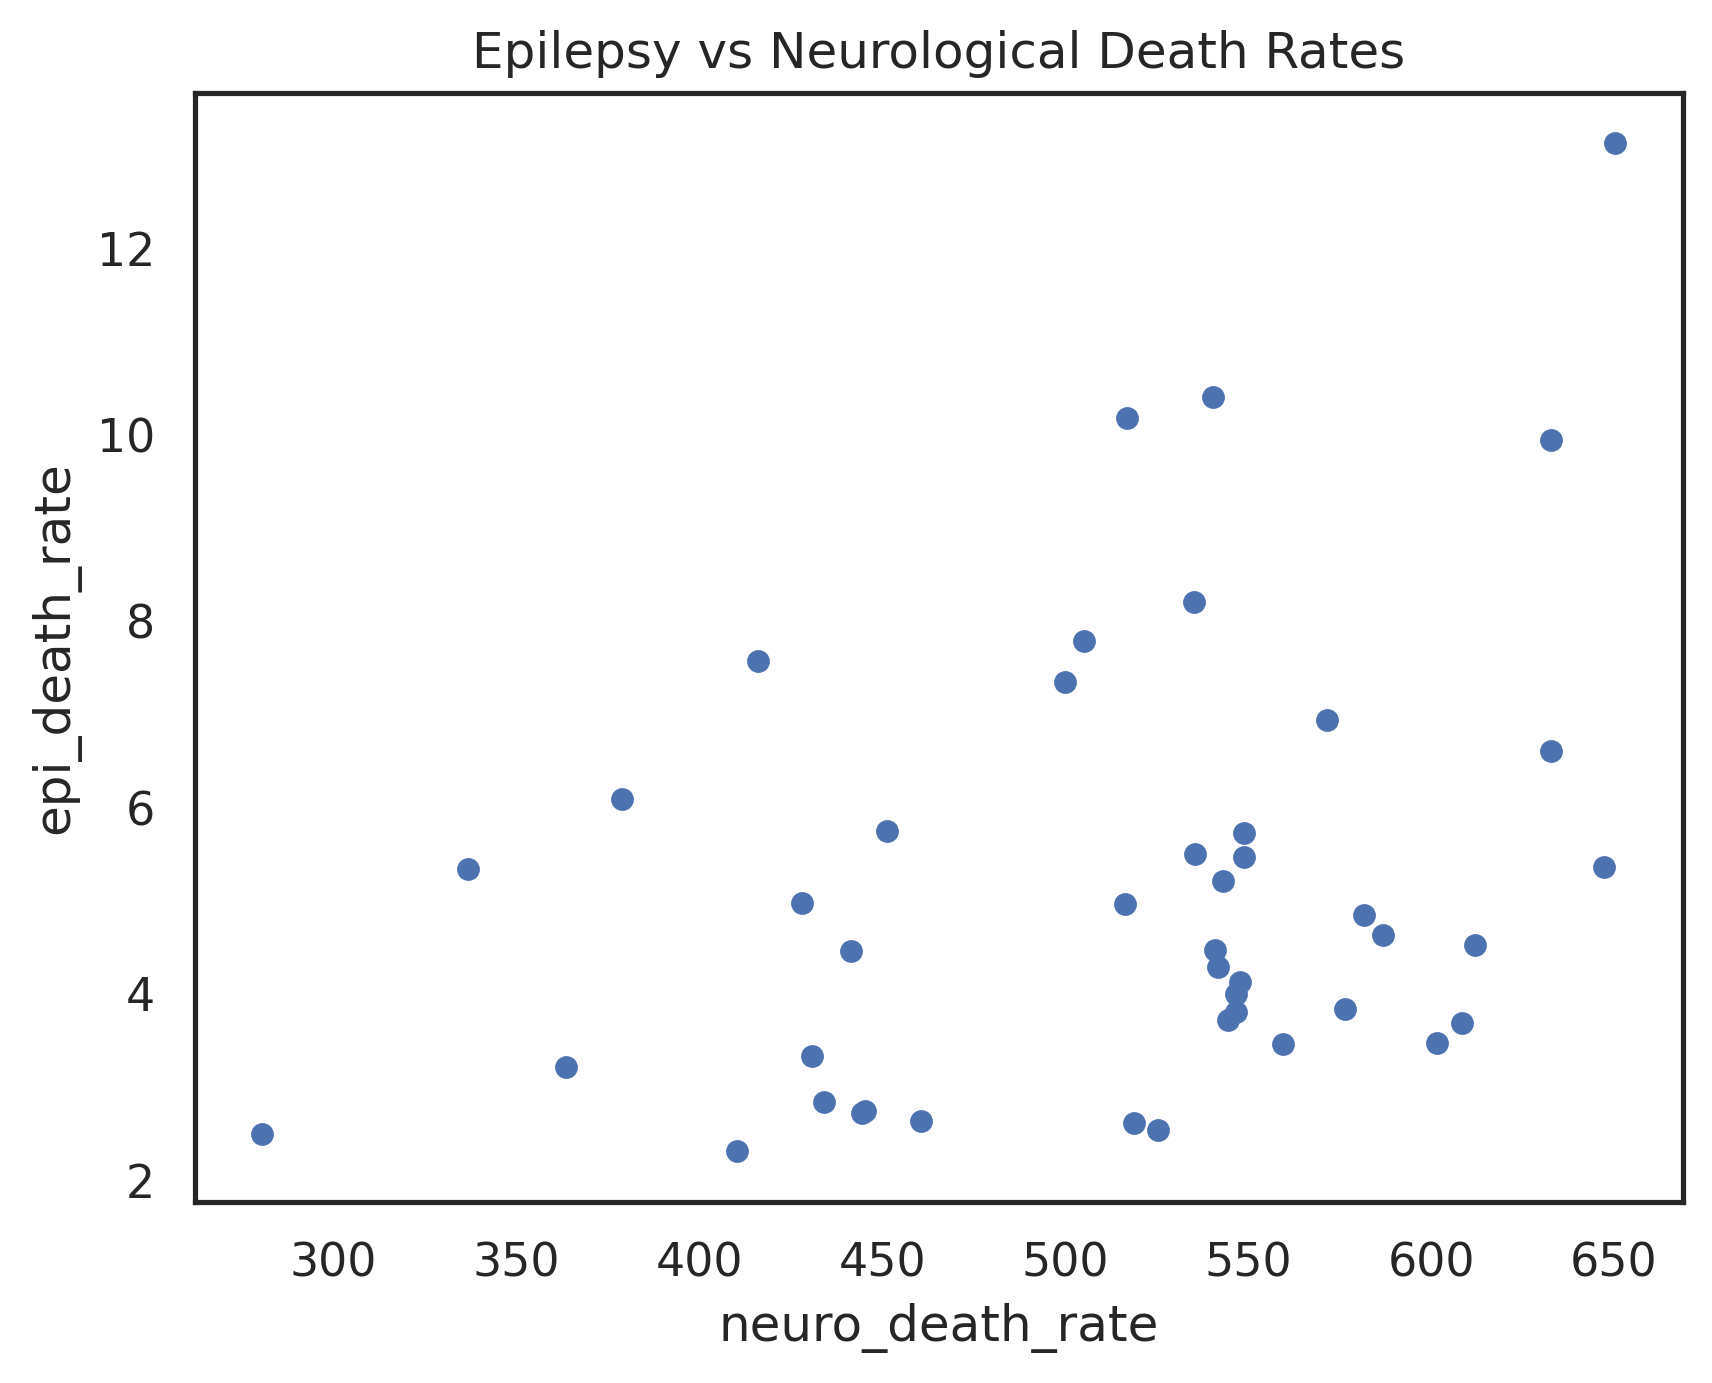

In [26]:
#%% Visualizations
# Scatterplot for death rates
average_rates.plot.scatter(x="neuro_death_rate", y="epi_death_rate", title="Epilepsy vs Neurological Death Rates")
plt.savefig("neuro_epi_death_rate_scatter.png")

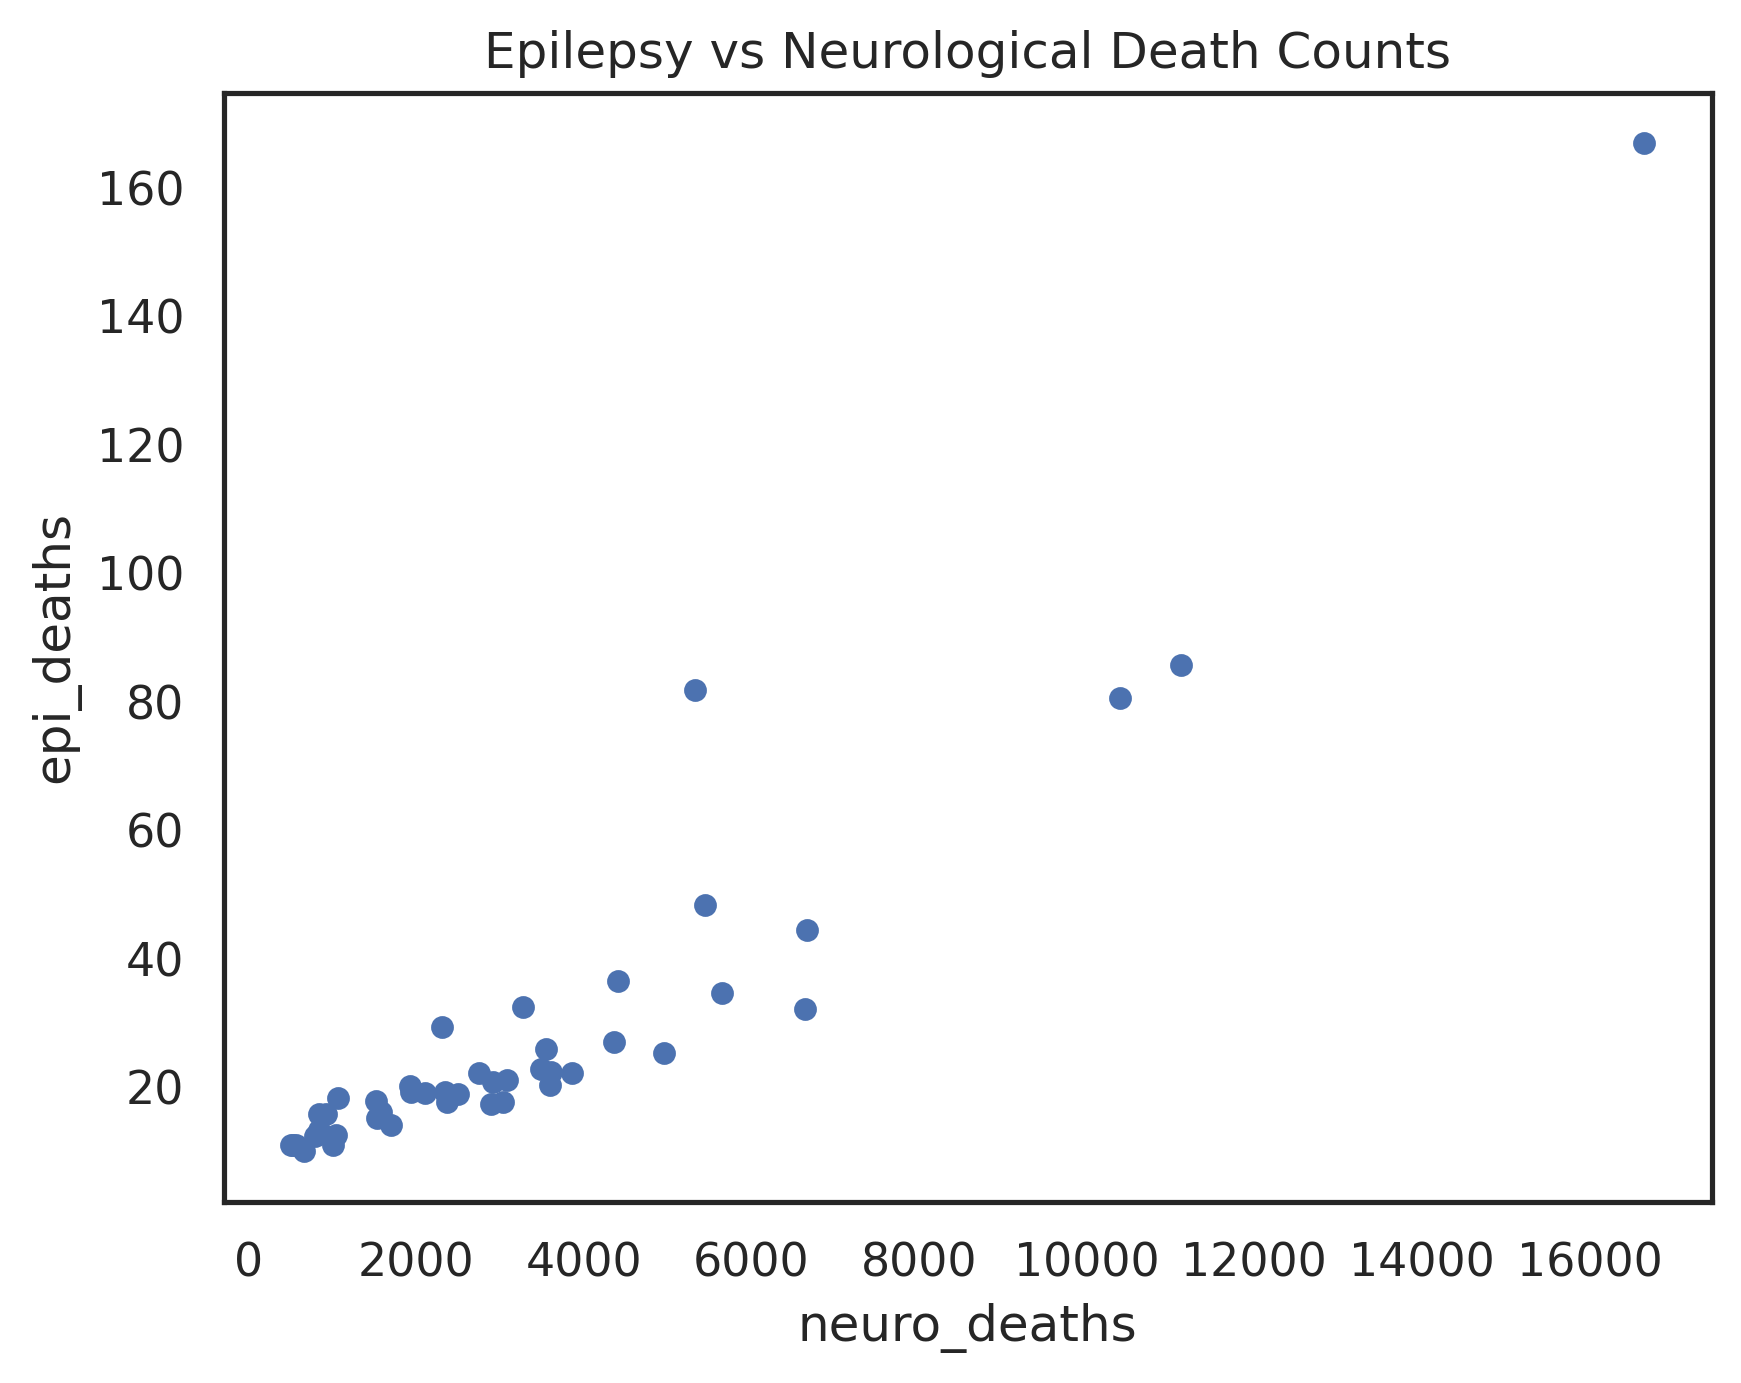

In [27]:
# Scatterplot for death counts
average_deaths.plot.scatter(x="neuro_deaths", y="epi_deaths", title="Epilepsy vs Neurological Death Counts")
plt.savefig("neuro_epi_death_counts_scatter.png")

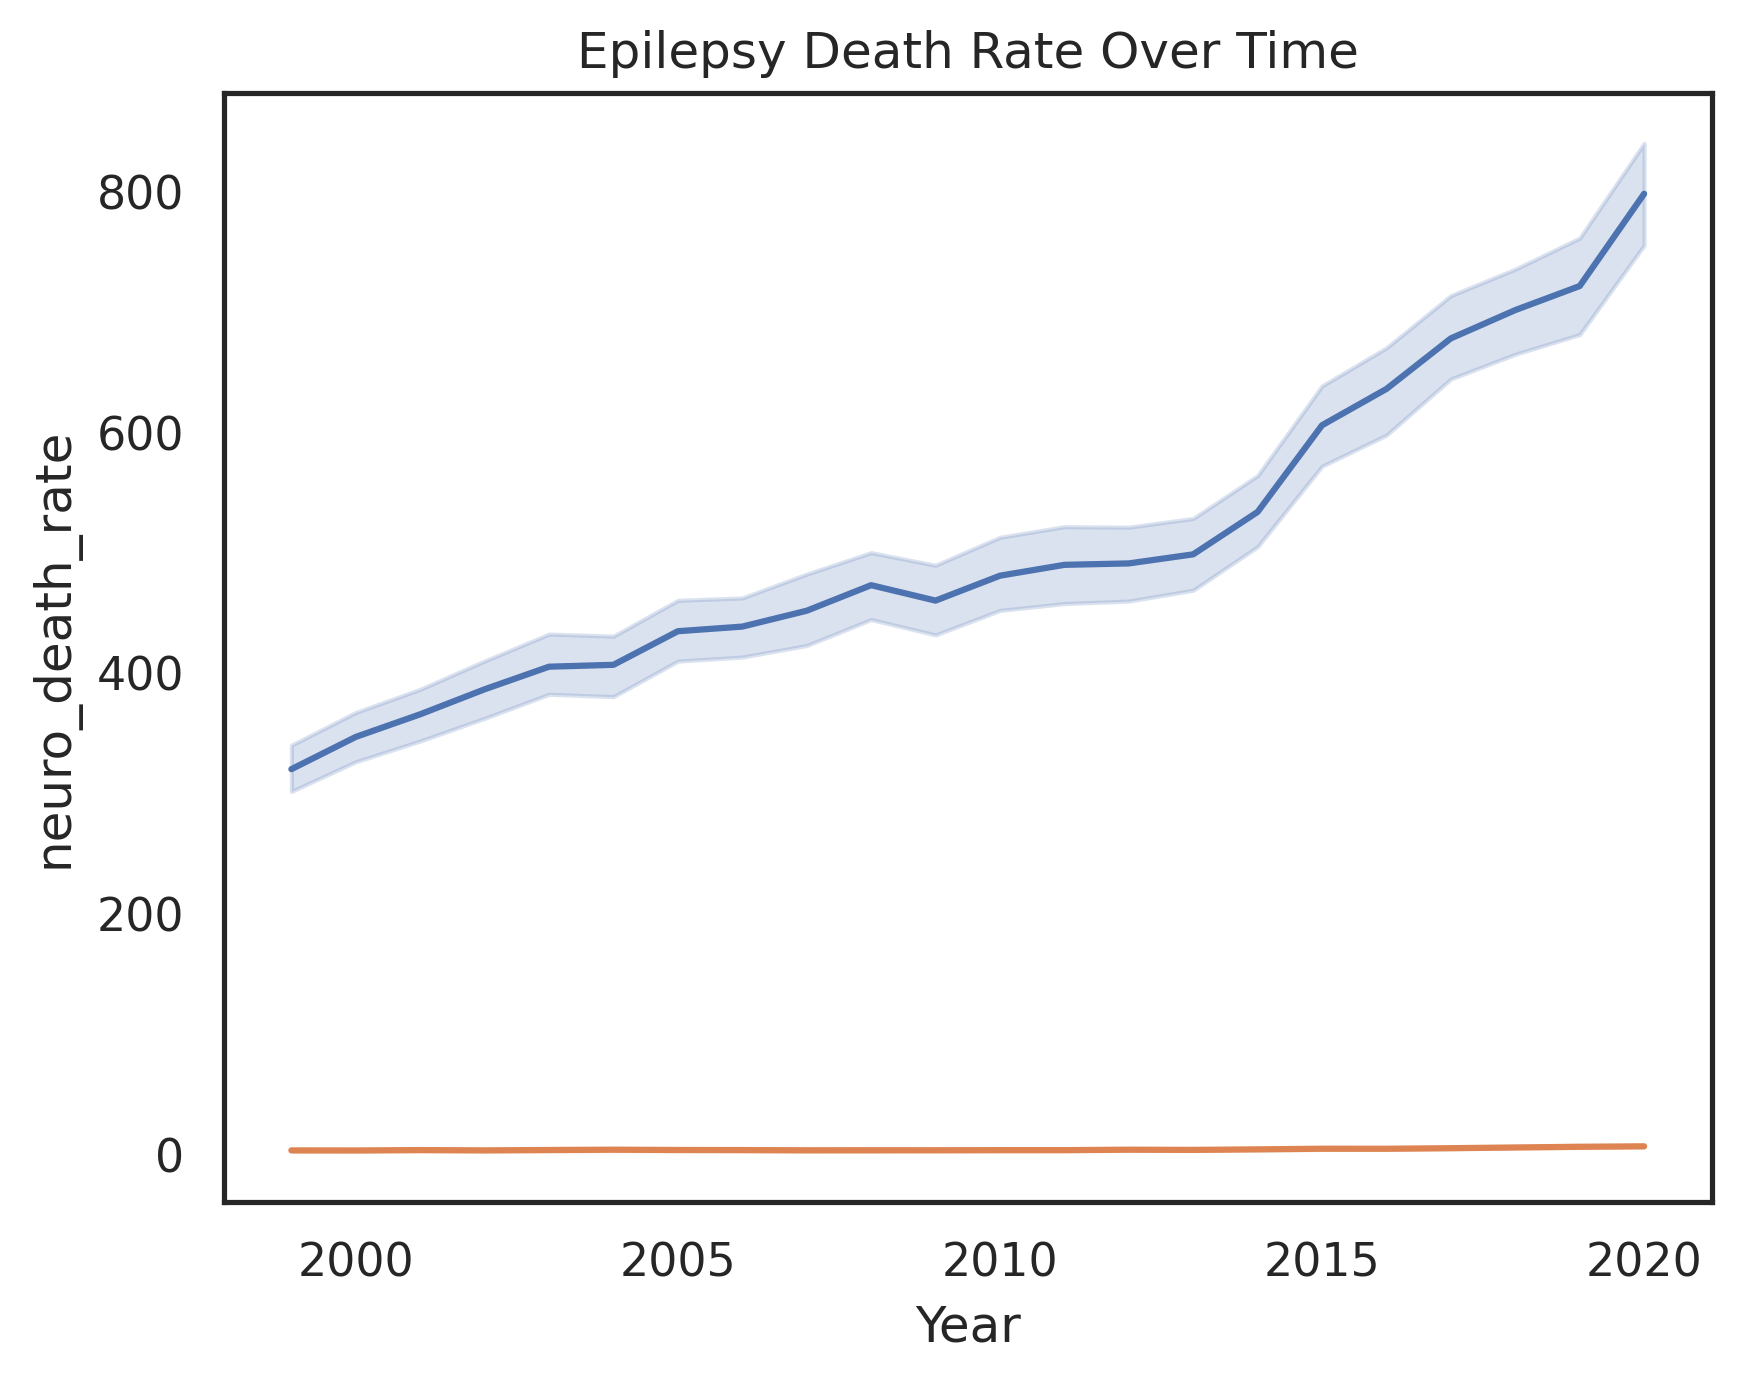

In [28]:
# Line plots for rates and counts
sns.lineplot(data=neuro_epi, x="Year", y="neuro_death_rate").set_title('Neurological Death Rate Over Time')
plt.savefig("neuro_death_rate_line_graph.png")
sns.lineplot(data=neuro_epi, x="Year", y="epi_death_rate").set_title('Epilepsy Death Rate Over Time')
plt.savefig("epi_death_rate_line_graph.png")

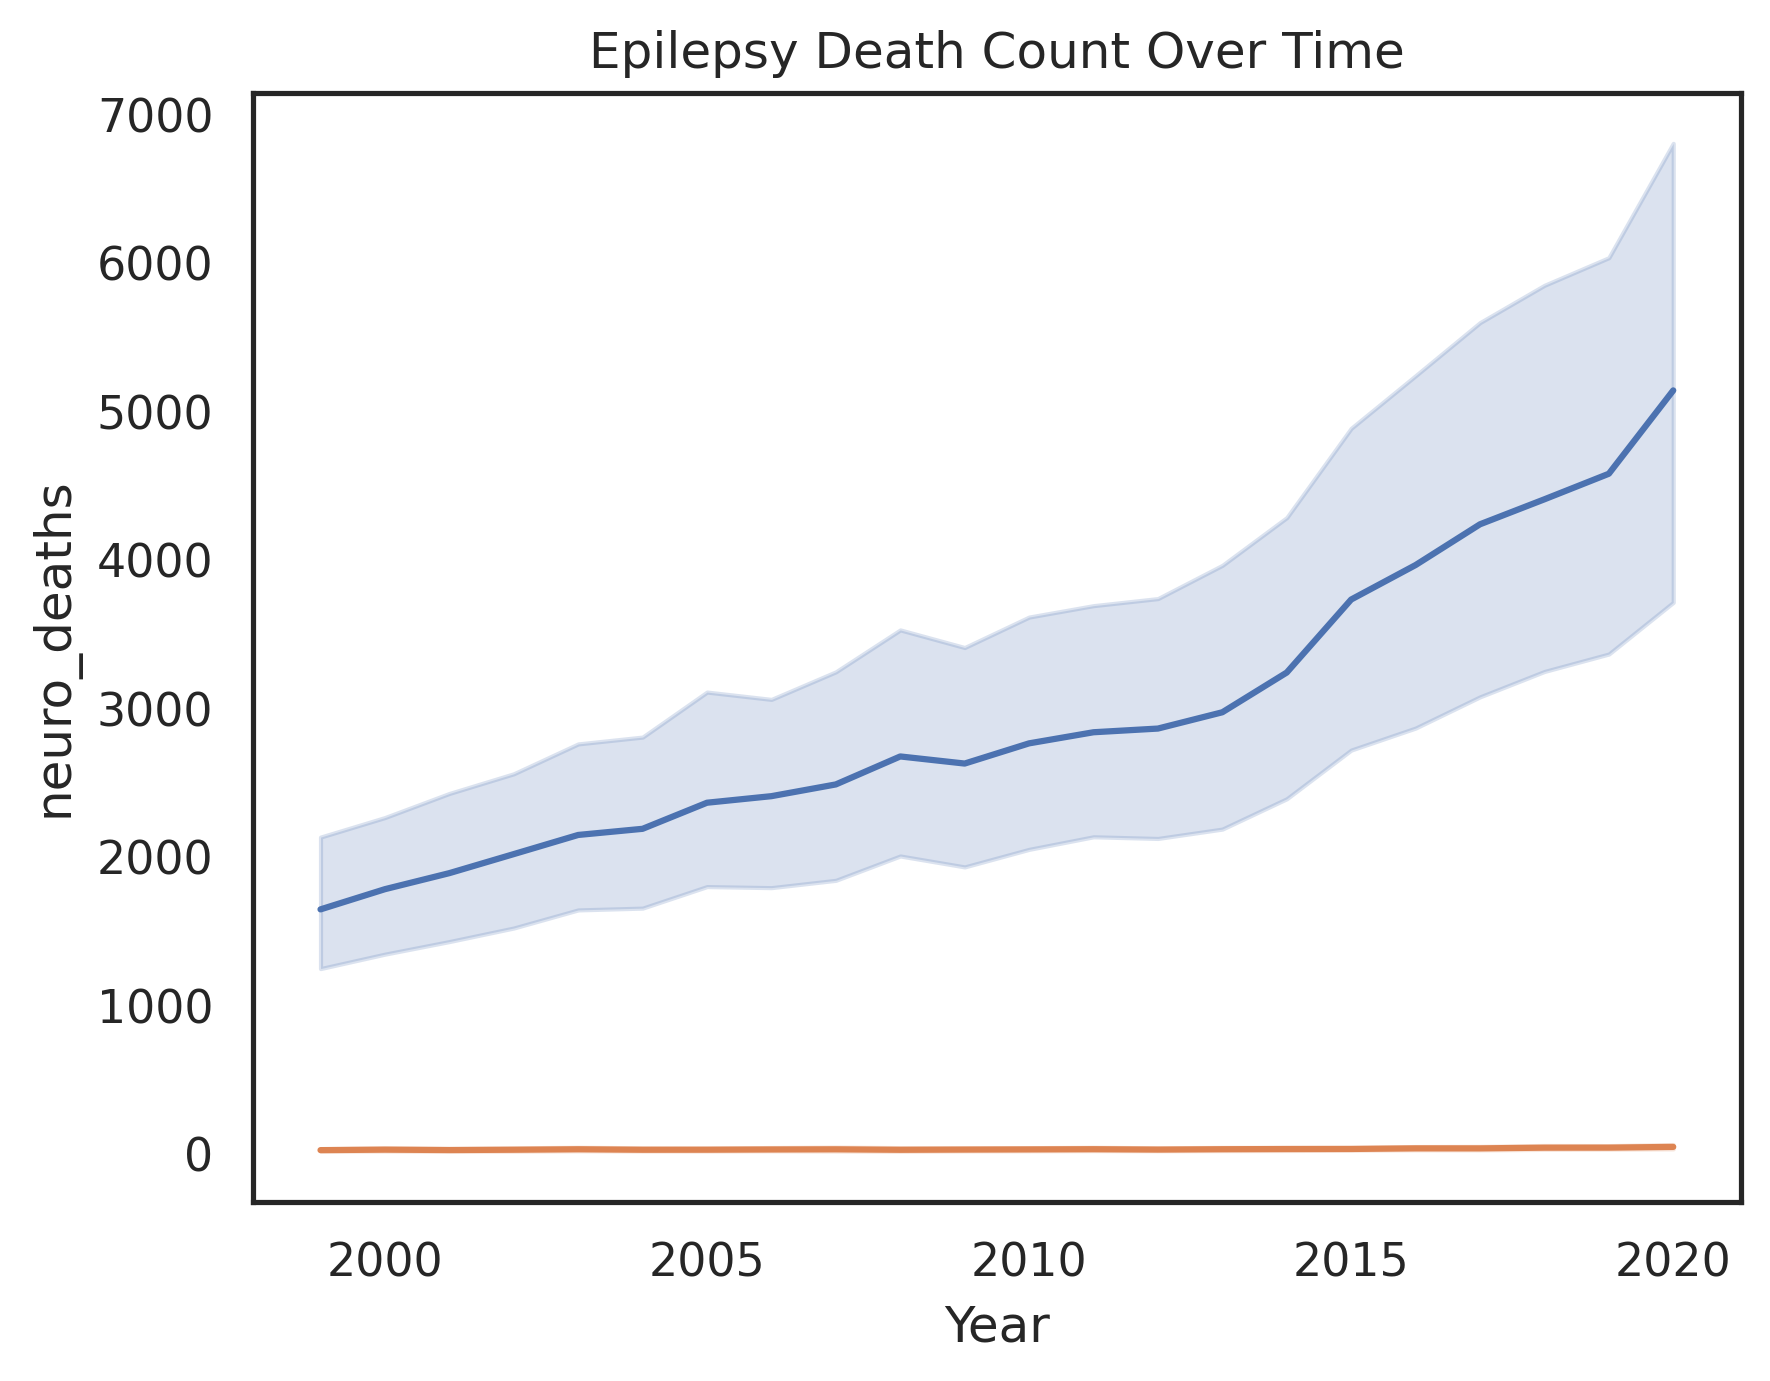

In [29]:
sns.lineplot(data=neuro_epi, x="Year", y="neuro_deaths").set_title('Neurological Death Count Over Time')
plt.savefig("neuro_death_count_line_graph.png")
sns.lineplot(data=neuro_epi, x="Year", y="epi_deaths").set_title('Epilepsy Death Count Over Time')
plt.savefig("epi_death_count_line_graph.png")

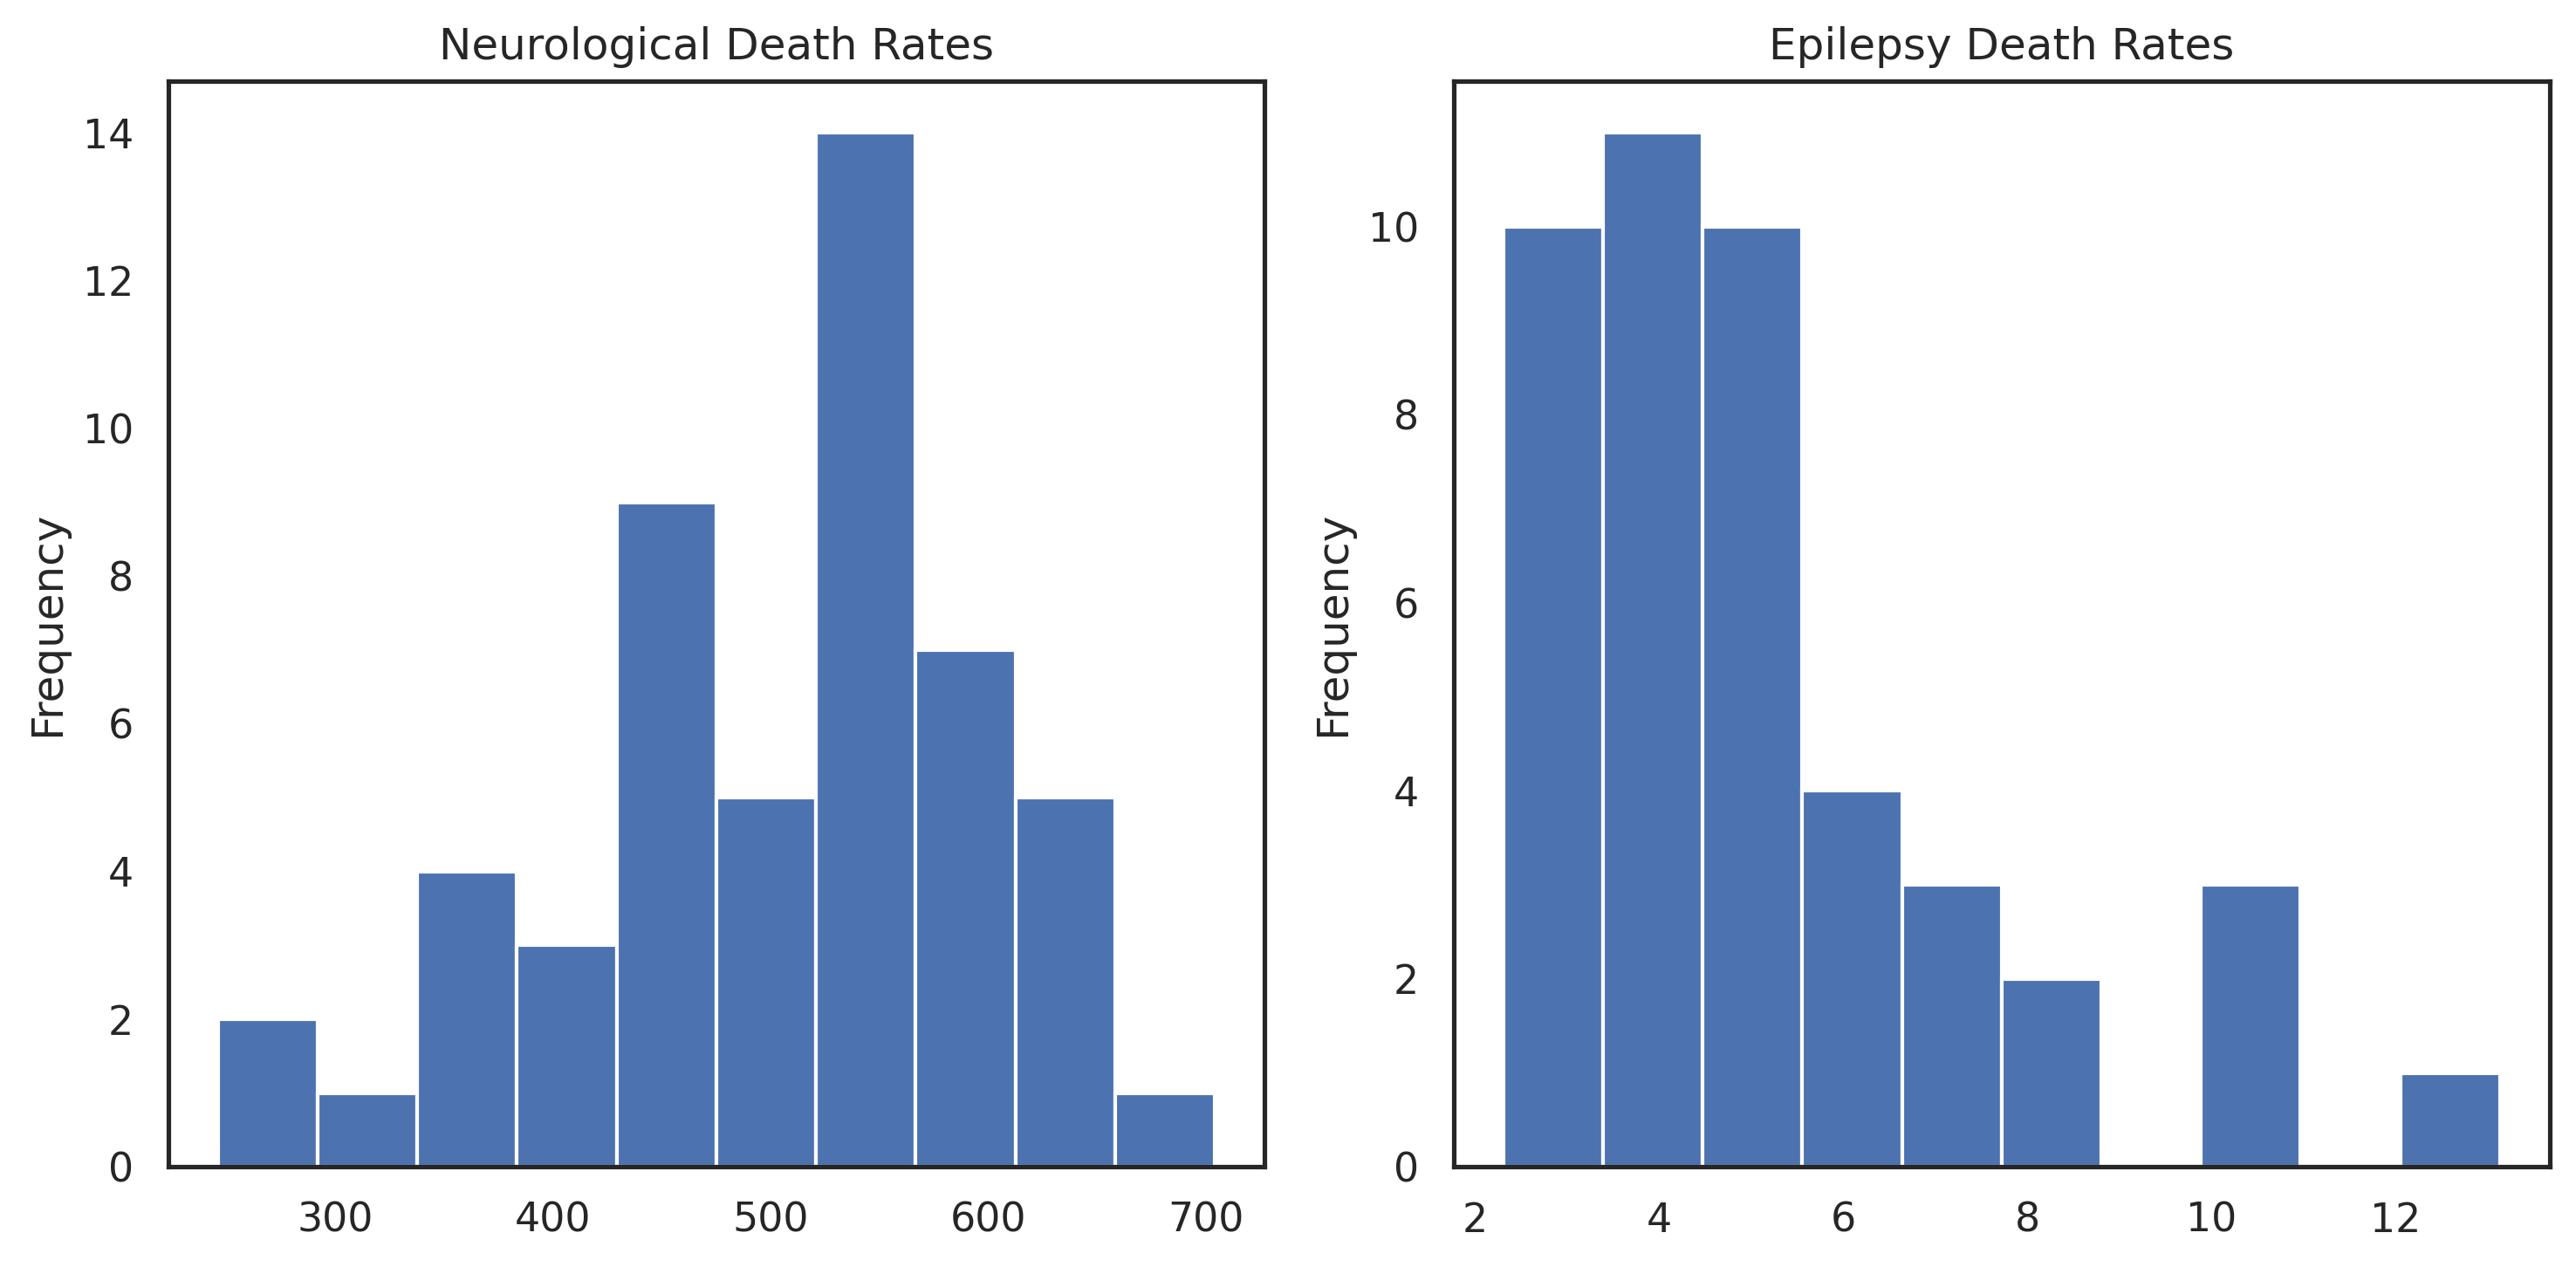

In [30]:
# Histograms for death rates
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
average_rates["neuro_death_rate"].plot.hist(ax=axes[0], title="Neurological Death Rates")
average_rates["epi_death_rate"].plot.hist(ax=axes[1], title="Epilepsy Death Rates")
fig.tight_layout()
plt.savefig("death_rate_histograms.png")

In [31]:
#%% Print summary statistics
print("Average Death Rates Sorted by Neurological Death Rate:")
print(average_rates.sort_values(by="neuro_death_rate"))
print("\nAverage Death Counts Sorted by Neurological Death Count:")
print(average_deaths.sort_values(by="neuro_deaths"))

Average Death Rates Sorted by Neurological Death Rate:
                      neuro_death_rate  epi_death_rate
State                                                 
Alaska                      246.127089             NaN
New York                    280.561185        2.490376
Nevada                      336.813797        5.339254
District of Columbia        341.546107             NaN
Maryland                    363.567142        3.210256
Utah                        378.938121        6.091431
Hawaii                      379.541777             NaN
New Jersey                  410.271870        2.308431
New Mexico                  416.023442        7.575311
Connecticut                 427.955481        4.978249
Texas                       430.750281        3.335704
Virginia                    434.130037        2.840847
California                  441.488320        4.462732
Illinois                    444.449889        2.721096
Georgia                     445.268859        2.746983
Colorado  